In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("StudentsPerformance.csv")


In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

# Data information
1) gender : male/female
2) race : group A/B/C/D/E
3) parental level of education : Describes the student's highest degree
4) lunch : standard or free/reduced
5) test preparation course : completed or not complete 
6) math score
7) reading score
8) writing score

# Data checks to perform
### Check
1) Missing values
2) Duplicates
3) Data type
4) Unique values of each column
5) Statistics
6) Various categories

## Check Missing values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### No missing values

# Check Duplicates

In [7]:
df.duplicated().sum()

0

#### No duplicates

# Check Data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Checking the number of unique values

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# Check Statistics

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Exploring data

In [11]:
print("Gender : ",df['gender'].unique())
print("Race/ethnicity : ",df['race/ethnicity'].unique())
print("Parental level of education : ", df['parental level of education'].unique())
print("Lunch : ",df['lunch'].unique())
print("Test preparation course : ",df['test preparation course'].unique())

Gender :  ['female' 'male']
Race/ethnicity :  ['group B' 'group C' 'group A' 'group D' 'group E']
Parental level of education :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Lunch :  ['standard' 'free/reduced']
Test preparation course :  ['none' 'completed']


In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("Numerical features : ", numeric_features)
print("Categorical features : ", categorical_features)


Numerical features :  ['math score', 'reading score', 'writing score']
Categorical features :  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


# Adding columns for "Total score" and "Average"

In [13]:
df["total_score"] = df['math score']+df['reading score']+df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# Exploring Data (Visualization)

### Histogram and KDE

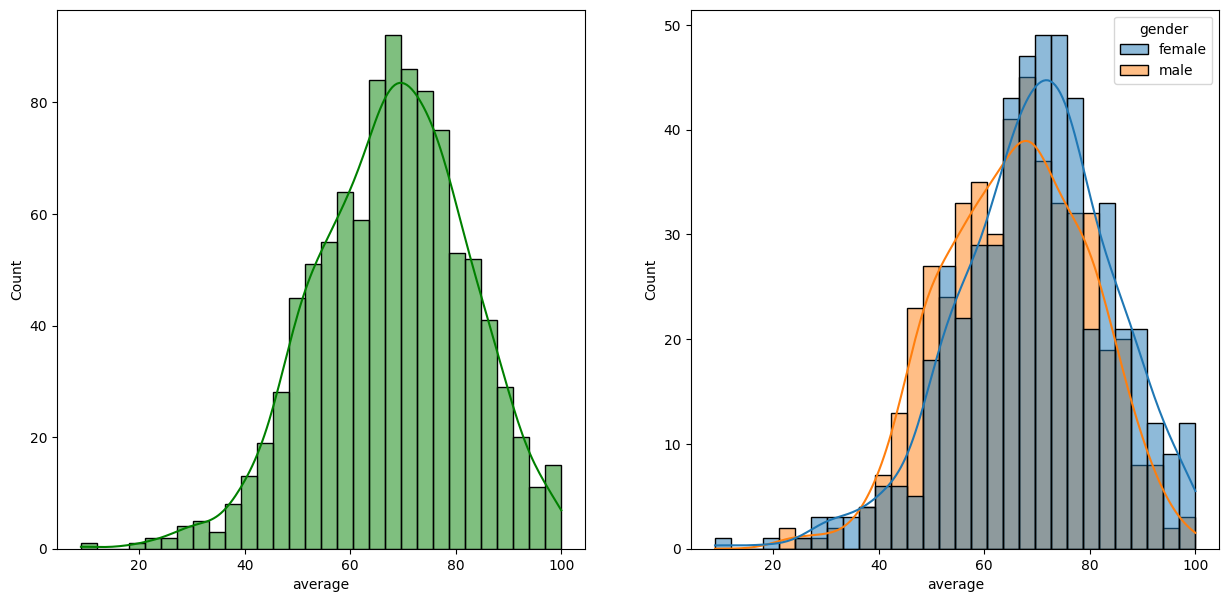

In [14]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins = 30, kde = True, hue = 'gender')
plt.show()


## Insight
### By this we can observe that female students perform better

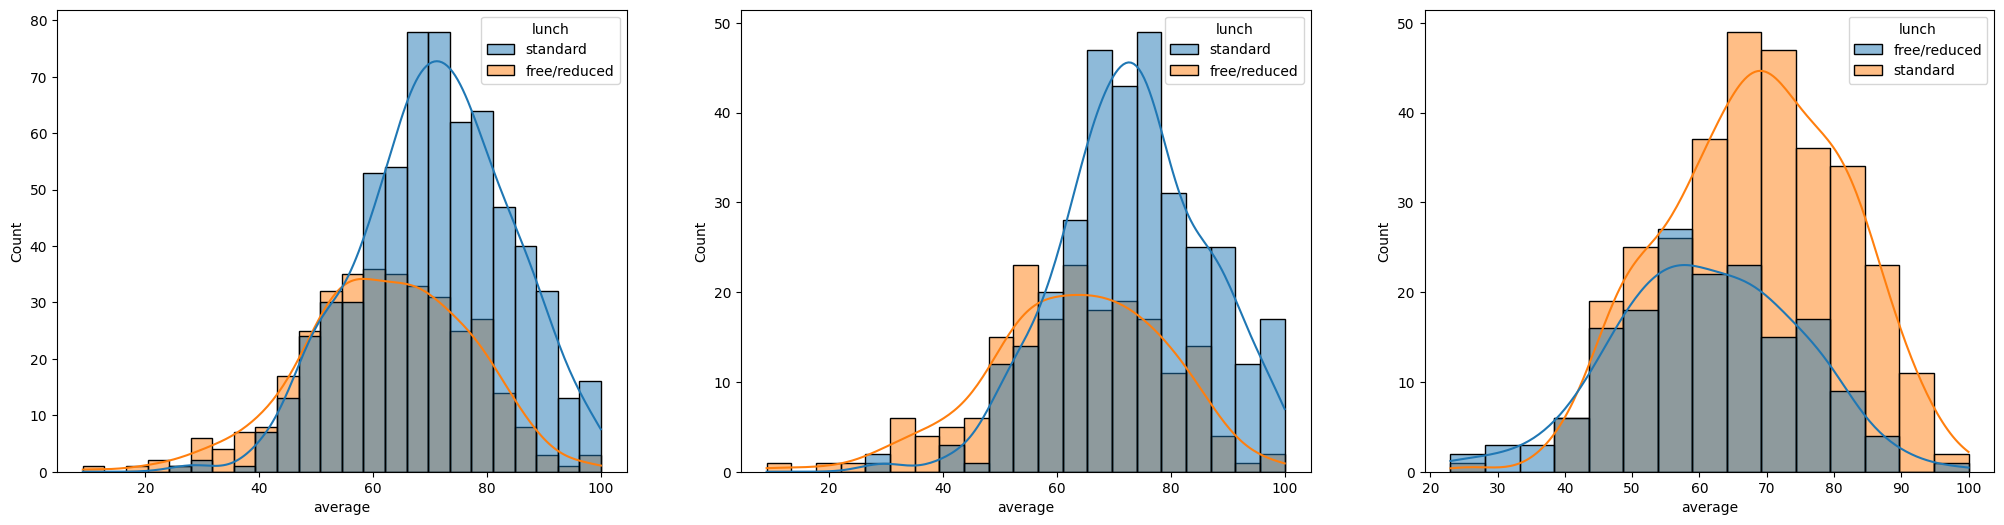

In [16]:
plt.subplots(1,3,figsize =(25,6))
plt.subplot(131)
sns.histplot(data=df,x = 'average', kde = True, hue = 'lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x = 'average', kde = True, hue = 'lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x = 'average', kde = True, hue = 'lunch')
plt.show()



## Insight
### Standard lunch helps students perform better irrespective of their gender

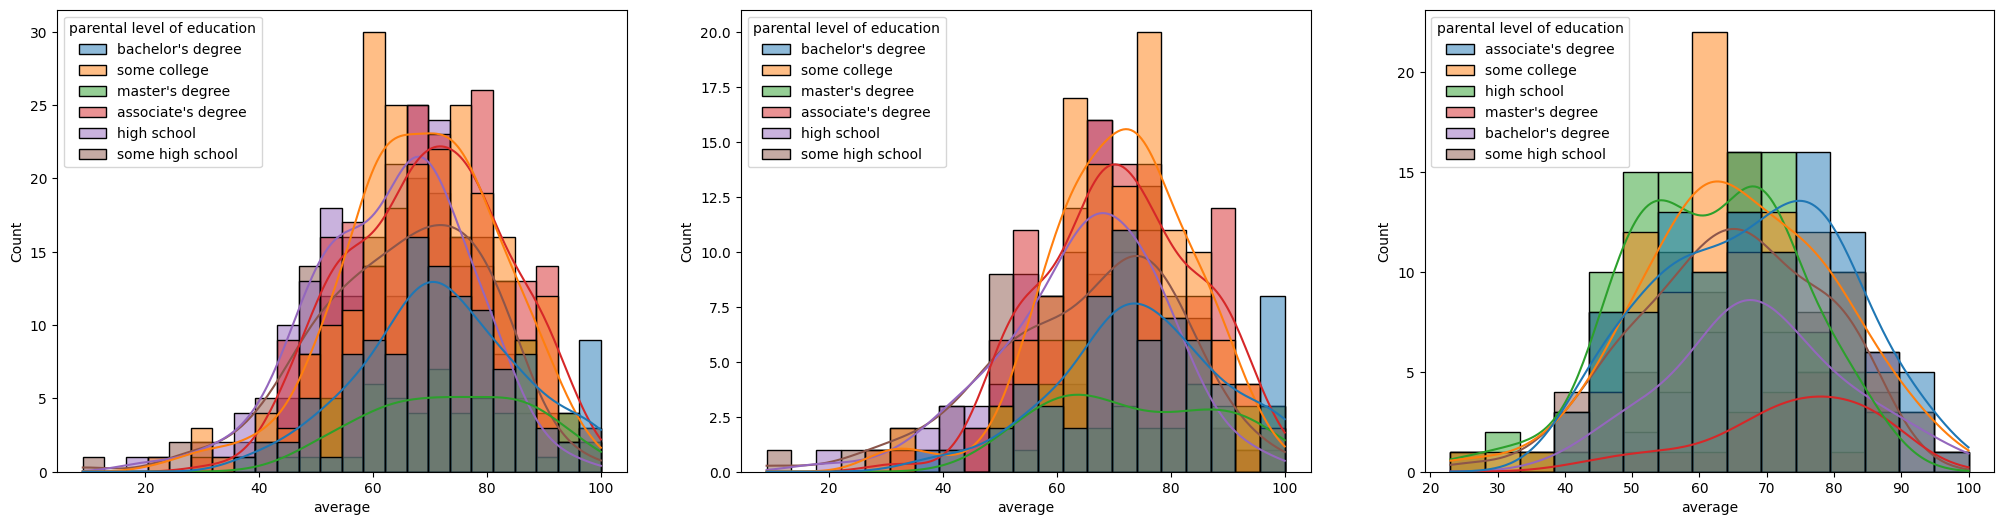

In [18]:
plt.subplots(1,3,figsize =(25,6))
plt.subplot(131)
sns.histplot(data=df,x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x = 'average', kde = True, hue = 'parental level of education')
plt.show()

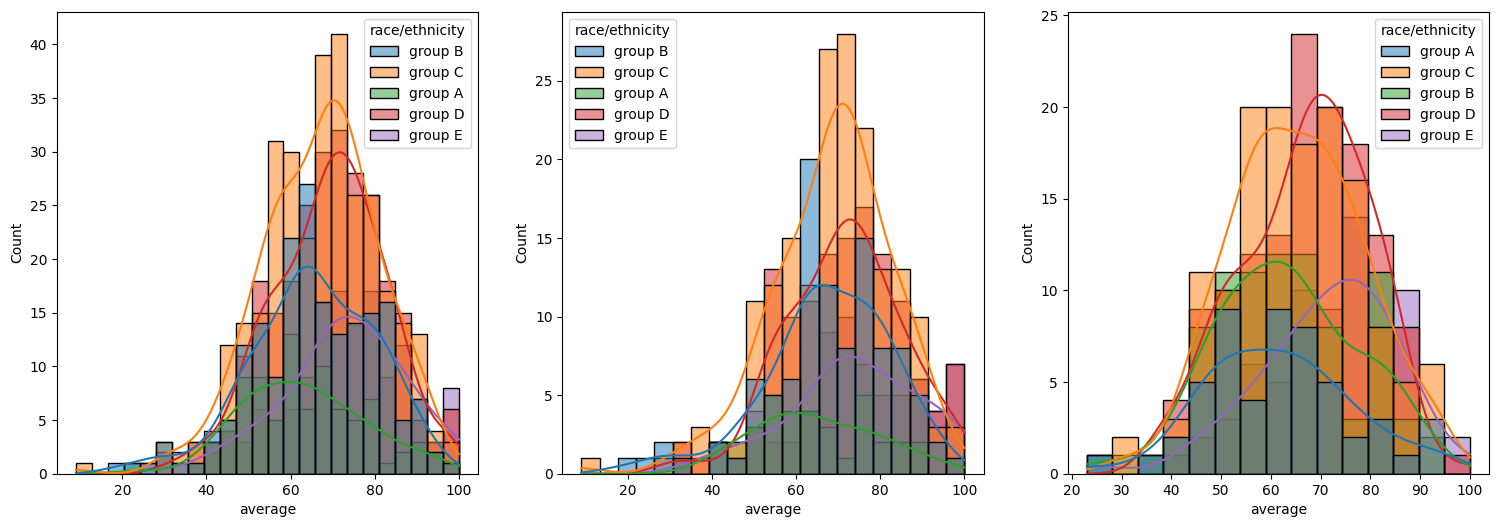

In [19]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

## Insight
### Students of group A and B tend to perform poorly irrespective of their gender

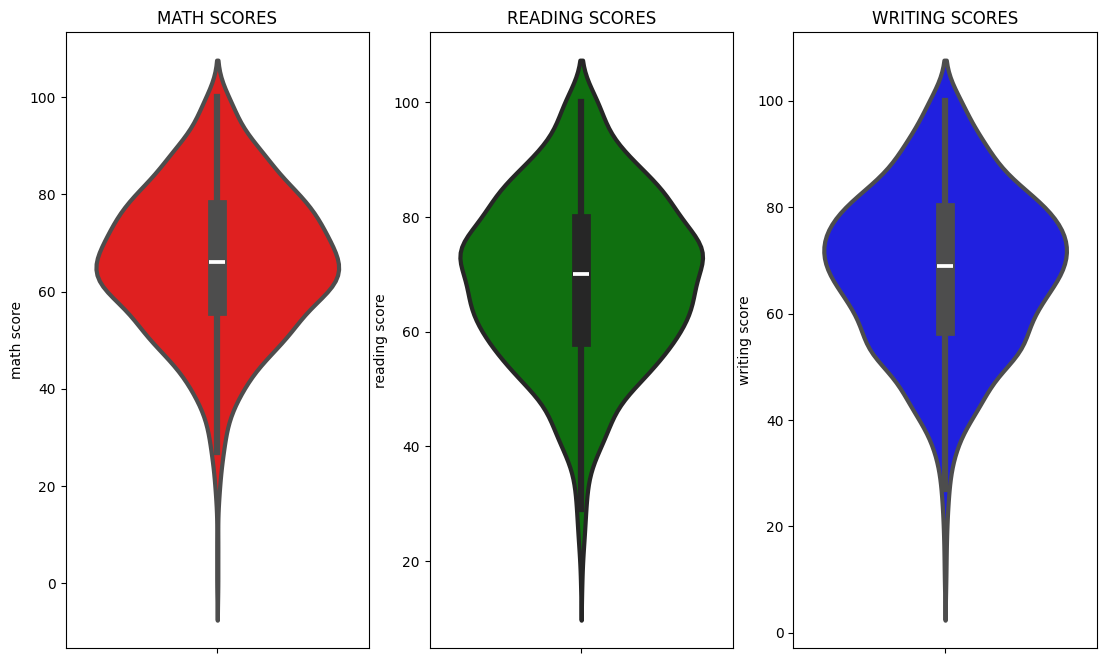

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(141)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(142)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(143)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

## Insight
### It is visible that most of the students score between 60-80 in maths and 50-80 in the other two

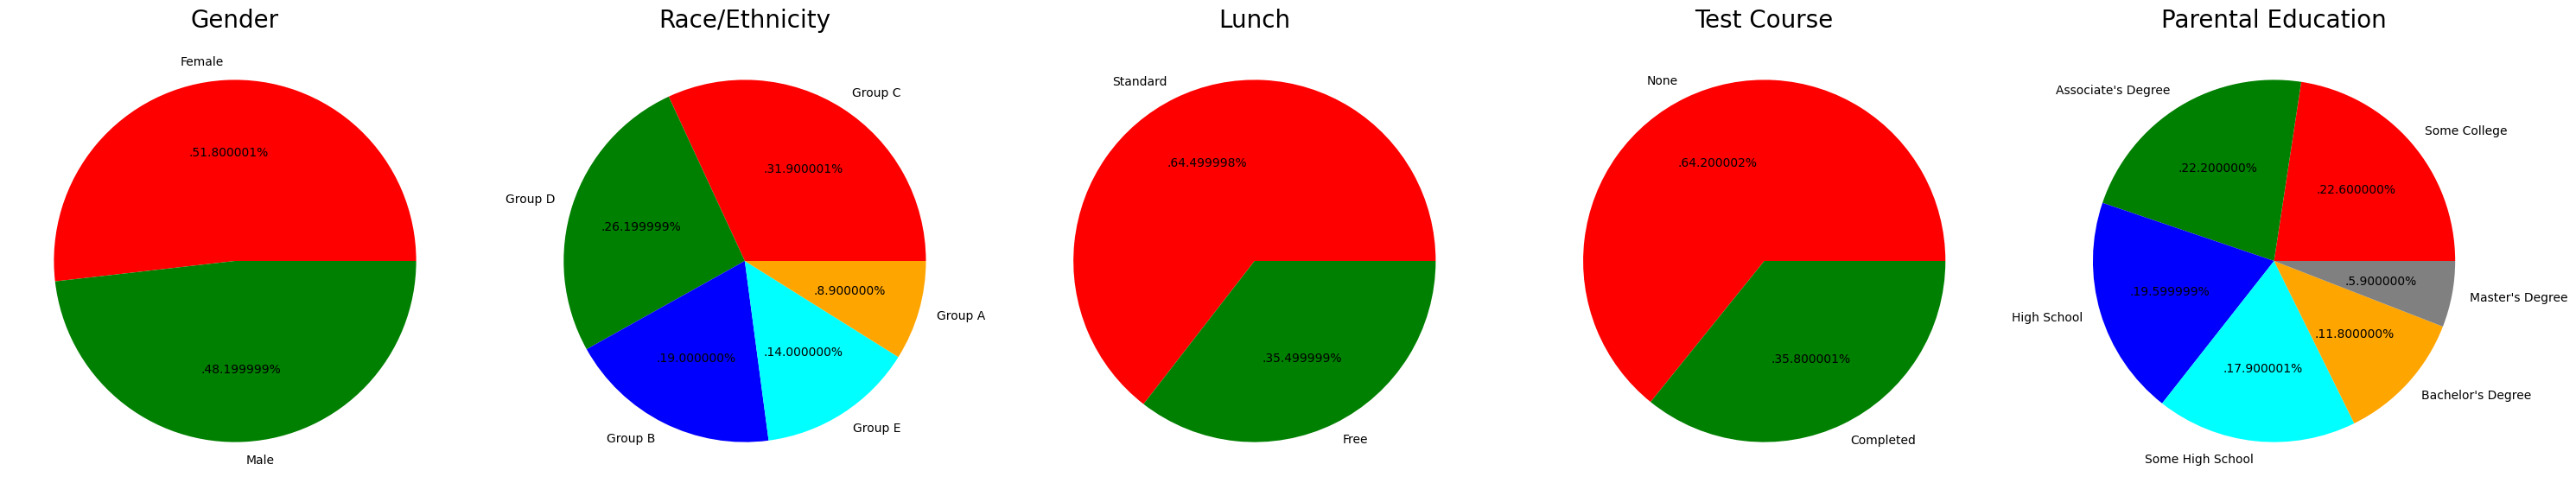

In [22]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

## Insights
1) Number of Male and Female students are almost equal
2) Number of students are greated in group C
3) Number of students who have standard lunch are greater
4) Number of students who have not enrolled in a test course are greater
5) Number of students who's parental education is `some college` and `Assocatie's Degree` is greatest

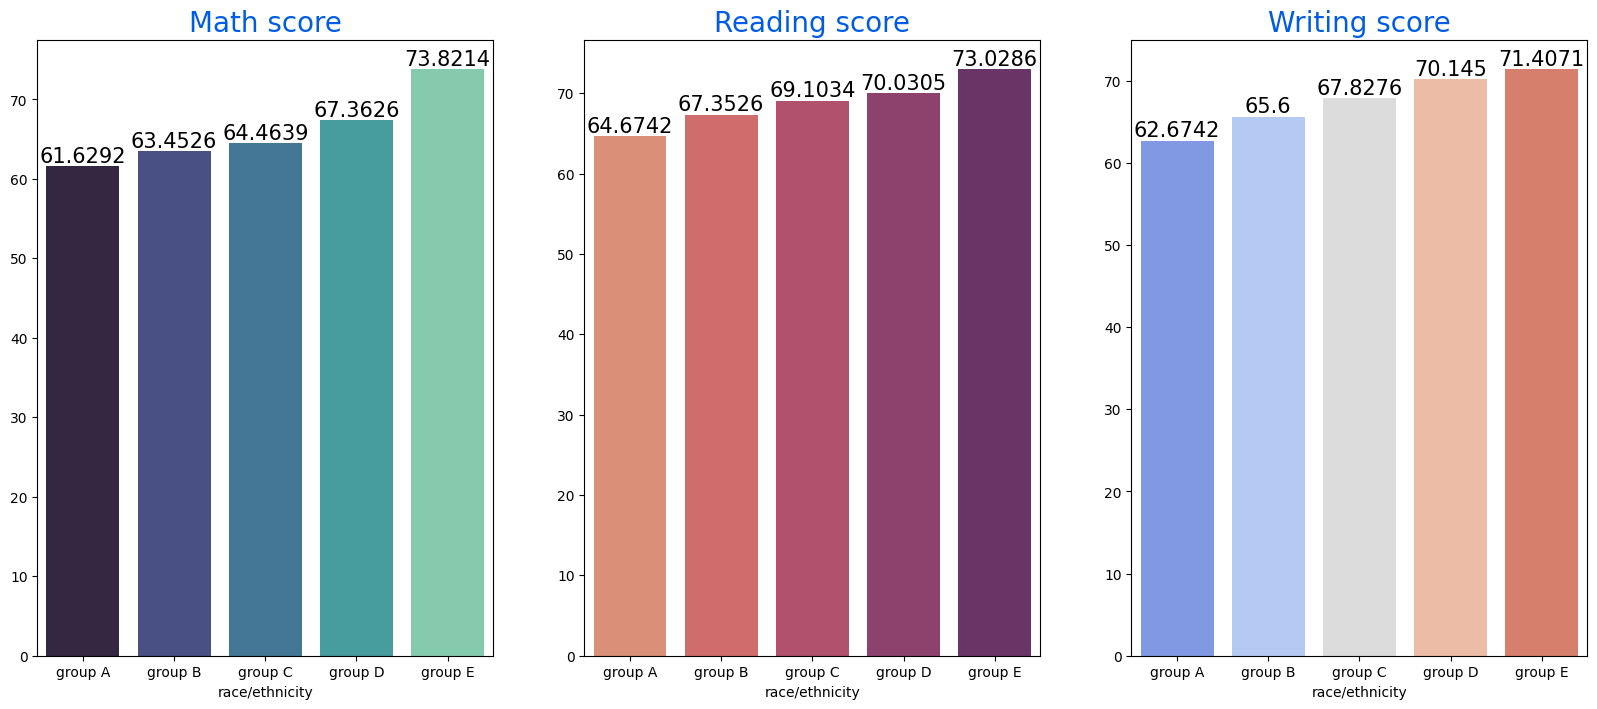

In [27]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

## Insights
1) Group E have scored the highest marks
2) Group A have scored the lowest marks

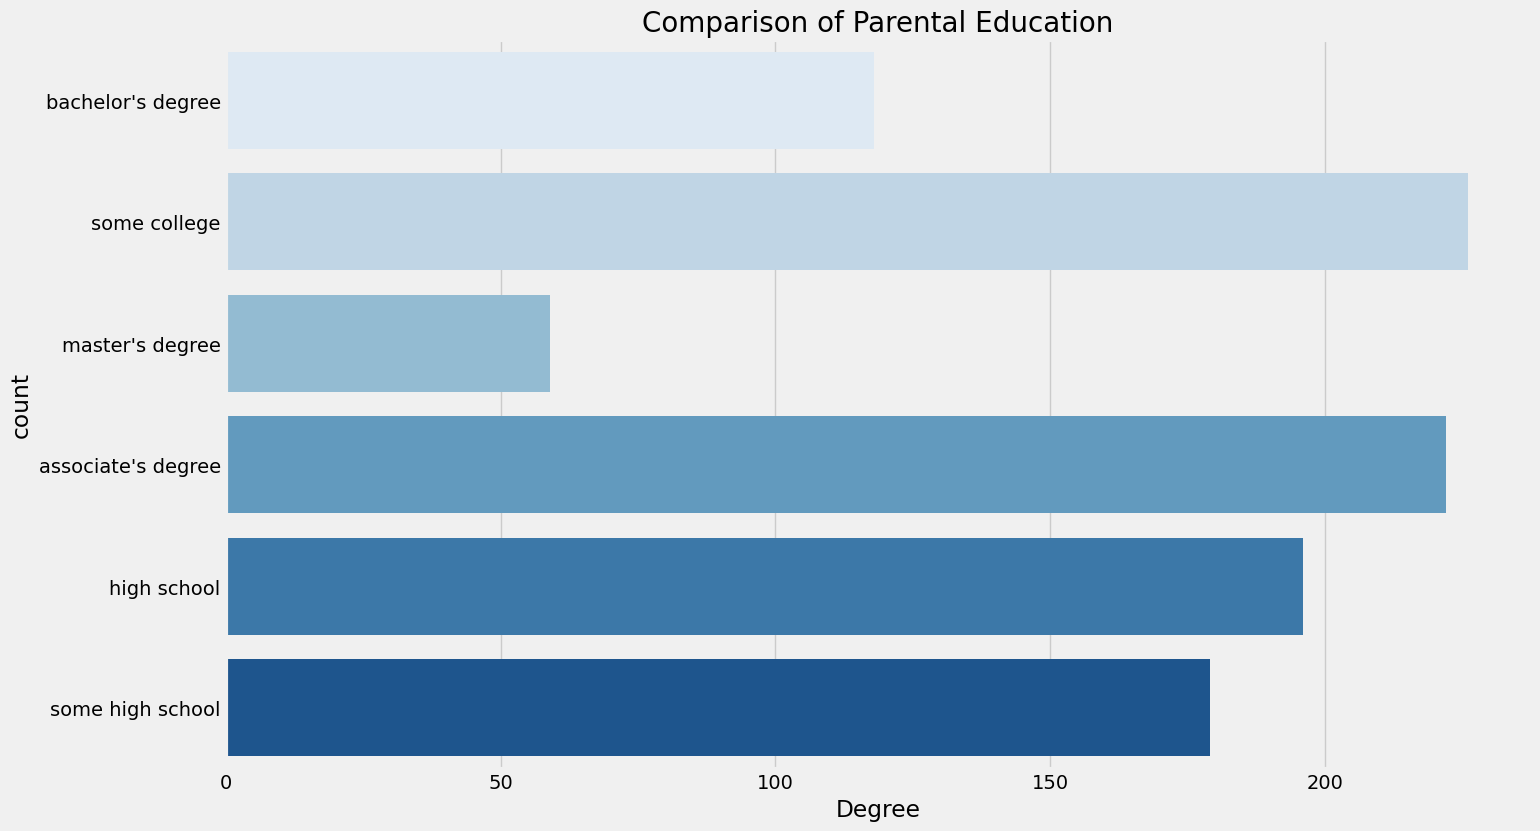

In [29]:

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()